In [5]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np

Miles_df =("Avg mileage per state - Sheet1.csv")
Car_df = ("Top Cars in each state EV_Gasoline - Sheet1.csv")
Prices_df =("Avg Gas and Electric per state - Sheet1.csv")
Miles_df = pd.read_csv(Miles_df)
Car_df = pd.read_csv(Car_df)
Prices_df = pd.read_csv(Prices_df)
Miles_df = Miles_df.rename(columns = {"Miles": "Avg Miles Driven per state"})
combined_Car_df = pd.merge(Car_df, Miles_df, left_on= ["States "], right_on=["State"], how="outer")

In [7]:
Prices_df = Prices_df.rename(columns = {"Regular": "Average Price per Gallon"})
Prices_df = Prices_df.rename(columns = {"Average EV per Gallon": "Average Price per Gallon EV"})
Combined_Car_df = pd.merge(combined_Car_df, Prices_df, how="outer", left_on="States ", right_on = "States")
Combined_Car_df = Combined_Car_df.rename(columns = {"Electrical ": "Electrical"})
Gas_Miles_Df= Combined_Car_df[['States','Regular','Electrical','Avg Miles Driven per state',
                               'Average Price per Gallon']].copy()

In [8]:
Ev_Regualar_DF = ("Electric Vs Regular - Sheet1.csv")
Ev_Regualar_DF = pd.read_csv(Ev_Regualar_DF)
Ev_Regualar_DF['MPG'] = Ev_Regualar_DF['MPG'].fillna(0)
Ev_Regualar_DF['kWh/100 mi'] = Ev_Regualar_DF['kWh/100 mi'].fillna(0)
Ev_Regualar_DF['Max Gallons'] = Ev_Regualar_DF['Max Mileage']/Ev_Regualar_DF['MPG']
Ev_Regualar_DF['Max EV kWh'] = Ev_Regualar_DF['Max Mileage']/(100/Ev_Regualar_DF['kWh/100 mi'])
kWh_rate = ("kWh Rate per state - Sheet1.csv")
kWh_rate = pd.read_csv(kWh_rate)

In [9]:
Ev_Regular_DF= Ev_Regualar_DF[['Model','Types','List Pricing','Max Mileage','MPG',
                                   'kWh/100 mi','Max Gallons','Max EV kWh']].copy()
Regular_DF = Ev_Regular_DF
indexNames = Regular_DF[ Regular_DF['Types'] == 'Electric' ].index
Regular_DF.drop(indexNames , inplace=True)
Regular_DF = Regular_DF.assign(Types='Regular')
del Regular_DF['kWh/100 mi']
del Regular_DF['Max EV kWh']
Regular_DF = Regular_DF.rename(columns = {"Model": "Regular"})
Regular_DF['Regular'] = Regular_DF['Regular'].str.replace('Ram Pickup', 'RAM 1500')
Regular_DF

,Regular,Types,List Pricing,Max Mileage,MPG,Max Gallons
3,Chevrolet Silverado,Regular,"$48,485",450,20.0,22.500000
4,Ford F-Series,Regular,"$28,745",500,22.0,22.727273
5,GMC Sierra,Regular,"$44,000",440,17.0,25.882353
6,Honda Civic,Regular,"$20,000",430,37.0,11.621622
7,Honda CR-V,Regular,"$25,150",406,31.0,13.096774
11,RAM 1500,Regular,"$32,154",560,22.0,25.454545
16,Toyota Camry,Regular,"$24,970",686,33.0,20.787879
17,Toyota Corolla,Regular,"$19,600",488,35.0,13.942857
18,Toyota RAV4,Regular,"$25,950",400,30.0,13.333333
19,Toyota Tacoma,Regular,"$26,050",380,20.0,19.000000


In [10]:
EV_DF = Ev_Regualar_DF[['Model','Types','List Pricing','Max Mileage','MPG',
                                   'kWh/100 mi','Max Gallons','Max EV kWh']].copy()
indexNames = EV_DF[ EV_DF['Types'] == 'Regular'].index
EV_DF.drop(indexNames , inplace=True)
indexNames = EV_DF[ EV_DF['Types'] == 'Gasoline'].index
EV_DF.drop(indexNames , inplace=True)
indexNames = EV_DF[ EV_DF['Types'] == 'Diesel'].index
EV_DF.drop(indexNames , inplace=True)
del EV_DF['MPG']
del EV_DF['Max Gallons']
EV_DF = EV_DF.rename(columns = {"Model": "Electrical"})
EV_DF['Electrical'] = EV_DF['Electrical'].str.replace('Nissan Leaf', 'Nissan LEAF')
EV_DF['Electrical'] = EV_DF['Electrical'].str.replace('Chevrolet Bolt', 'Chevy Bolt')
EV_DF.head()

,Electrical,Types,List Pricing,Max Mileage,kWh/100 mi,Max EV kWh
0,Audi eTron,Electric,"$77,400",204,46.0,93.84
1,BMW i3,Electric,"$44,450",153,30.0,45.90
2,Chevy Bolt,Electric,"$36,620",238,29.0,69.02
8,Hyundai Kona,Electric,"$37,190",258,27.0,69.66
9,Hyundai Ioniq,Electric,"$33,045",193,25.0,48.25


In [11]:
EV_DF['Avg Mileage'] = EV_DF["Max Mileage"].mean()
EV_DF['Avg EV kWh'] = EV_DF["Max EV kWh"].mean()
EV_DF['Avg EV List Pricing'] = EV_DF["List Pricing"].mean()
Regular_DF['Avg Gallons'] = Regular_DF["Max Gallons"].mean()
Regular_DF['Avg Mileage'] = Regular_DF["Max Mileage"].mean()
Regular_DF['Avg Reg List Pricing'] = Regular_DF["List Pricing"].mean()
del Regular_DF['List Pricing']
del EV_DF['List Pricing']
Regular_DF

TypeError: Could not convert $77,400$44,450$36,620$37,190$33,045$31,600$37,990$74,990$79,990$49,900 to numeric

In [93]:
Regular_Combined_df = pd.merge(Gas_Miles_Df, Regular_DF,
                                 how='outer', on='Regular')
del Regular_Combined_df['Types']
del Regular_Combined_df['Electrical']
Regular_Combined_df['Max Gallons']= Regular_Combined_df["Max Gallons"].map("{:,.2f}".format)
Regular_Combined_df.head()

,States,Regular,Avg Miles Driven per state,Average Price per Gallon,Max Mileage,MPG,Max Gallons,Avg Gallons,Avg Mileage,Avg Reg List Pricing
0,AL,RAM 1500,"16,054",$2.07,560,22.0,25.45,18.834664,474.0,29510.4
1,AK,RAM 1500,"9,915",$2.53,560,22.0,25.45,18.834664,474.0,29510.4
2,AZ,RAM 1500,"14,493",$2.31,560,22.0,25.45,18.834664,474.0,29510.4
3,AR,RAM 1500,"14,974",$2.06,560,22.0,25.45,18.834664,474.0,29510.4
4,NV,RAM 1500,"12,869",$2.66,560,22.0,25.45,18.834664,474.0,29510.4


In [94]:
EV_Combined_df = pd.merge(Gas_Miles_Df, EV_DF,
                                 how='outer', on='Electrical')
EV_Combined_df = pd.merge(EV_Combined_df, kWh_rate,
                                 how='outer', on='States')
Ev_Regular_DF.head()
del EV_Combined_df['Types']
del EV_Combined_df['Regular']
del EV_Combined_df['Average Price per Gallon']
EV_Combined_df['Avg kWh Rate'].round(5)
EV_Combined_df.head()
#kWh rate and avg cents per rate given  

,States,Electrical,Avg Miles Driven per state,Max Mileage,kWh/100 mi,Max EV kWh,Avg Mileage,Avg EV kWh,Avg EV List Pricing,Avg kWh Rate
0,AL,Nissan LEAF,"16,054",157,30.0,47.1,271.6,82.322,49850.5,21.79
1,AR,Nissan LEAF,"14,974",157,30.0,47.1,271.6,82.322,49850.5,12.12
2,CT,Nissan LEAF,"11,595",157,30.0,47.1,271.6,82.322,49850.5,21.50
3,GA,Nissan LEAF,"18,920",157,30.0,47.1,271.6,82.322,49850.5,11.01
4,HI,Nissan LEAF,"11,104",157,30.0,47.1,271.6,82.322,49850.5,32.08


In [95]:
Regular_Combined_df['Average Price per Gallon'] = Regular_Combined_df['Average Price per Gallon'].str.replace('$', '')
Regular_Combined_df['Average Price per Gallon'] = Regular_Combined_df['Average Price per Gallon'].astype('float')
Regular_Combined_df['Max Gallons'] = Regular_Combined_df['Max Gallons'].astype('float')
for name, dtype in Regular_Combined_df.dtypes.iteritems():
    print(name, dtype)

States object
Regular object
Avg Miles Driven per state object
Average Price per Gallon float64
Max Mileage int64
MPG float64
Max Gallons float64
Avg Gallons float64
Avg Mileage float64
Avg Reg List Pricing float64


In [96]:
Regular_Combined_df['Full Gasoline Price'] = (Regular_Combined_df['Avg Gallons'] * Regular_Combined_df['Average Price per Gallon'])
Regular_Combined_df['Avg Miles Driven per state'] = Regular_Combined_df['Avg Miles Driven per state'].str.replace(',', '')
Regular_Combined_df['Avg Miles Driven per state'] = Regular_Combined_df['Avg Miles Driven per state'].astype('float')
Regular_Combined_df['Yearly Gas Price']= (Regular_Combined_df['Avg Miles Driven per state']/Regular_Combined_df['Avg Mileage'])*Regular_Combined_df['Full Gasoline Price']
Regular_Combined_df['Yearly Gas Price']= Regular_Combined_df["Yearly Gas Price"].map("{:,.2f}".format)
Regular_Combined_df.head()

,States,Regular,Avg Miles Driven per state,Average Price per Gallon,Max Mileage,MPG,Max Gallons,Avg Gallons,Avg Mileage,Avg Reg List Pricing,Full Gasoline Price,Yearly Gas Price
0,AL,RAM 1500,16054.0,2.07,560,22.0,25.45,18.834664,474.0,29510.4,38.987754,"1,320.48"
1,AK,RAM 1500,9915.0,2.53,560,22.0,25.45,18.834664,474.0,29510.4,47.651699,996.76
2,AZ,RAM 1500,14493.0,2.31,560,22.0,25.45,18.834664,474.0,29510.4,43.508073,"1,330.30"
3,AR,RAM 1500,14974.0,2.06,560,22.0,25.45,18.834664,474.0,29510.4,38.799407,"1,225.70"
4,NV,RAM 1500,12869.0,2.66,560,22.0,25.45,18.834664,474.0,29510.4,50.100205,"1,360.21"


In [97]:
EV_Combined_df['Avg Miles Driven per state'] = EV_Combined_df['Avg Miles Driven per state'].str.replace(',', '')
EV_Combined_df['Avg Miles Driven per state'] = EV_Combined_df['Avg Miles Driven per state'].astype('float')
EV_Combined_df.fillna(0)
for name, dtype in EV_Combined_df.dtypes.iteritems():
    print(name, dtype)

States object
Electrical object
Avg Miles Driven per state float64
Max Mileage int64
kWh/100 mi float64
Max EV kWh float64
Avg Mileage float64
Avg EV kWh float64
Avg EV List Pricing float64
Avg kWh Rate float64


In [98]:
import pandas as pd
pd.options.mode.chained_assignment = None 
EV_Combined_df['Yearly Electric Price']= ((EV_Combined_df['Avg Miles Driven per state']/EV_Combined_df['Avg Mileage'])*(EV_Combined_df['Max EV kWh']*EV_Combined_df['Avg kWh Rate']))/100
EV_Combined_df['Yearly Electric Price']= EV_Combined_df["Yearly Electric Price"].map("{:,.2f}".format)
EV_Combined_df = EV_Combined_df.iloc[:-5]
EV_Combined_df

,States,Electrical,Avg Miles Driven per state,Max Mileage,kWh/100 mi,Max EV kWh,Avg Mileage,Avg EV kWh,Avg EV List Pricing,Avg kWh Rate,Yearly Electric Price
0,AL,Nissan LEAF,16054.0,157,30.0,47.10,271.6,82.322,49850.5,21.79,606.64
1,AR,Nissan LEAF,14974.0,157,30.0,47.10,271.6,82.322,49850.5,12.12,314.73
2,CT,Nissan LEAF,11595.0,157,30.0,47.10,271.6,82.322,49850.5,21.50,432.32
3,GA,Nissan LEAF,18920.0,157,30.0,47.10,271.6,82.322,49850.5,11.01,361.24
4,HI,Nissan LEAF,11104.0,157,30.0,47.10,271.6,82.322,49850.5,32.08,617.74
5,IL,Nissan LEAF,12921.0,157,30.0,47.10,271.6,82.322,49850.5,9.81,219.81
6,IN,Nissan LEAF,17821.0,157,30.0,47.10,271.6,82.322,49850.5,12.38,382.60
7,KS,Nissan LEAF,14742.0,157,30.0,47.10,271.6,82.322,49850.5,10.33,264.09
8,LA,Nissan LEAF,14805.0,157,30.0,47.10,271.6,82.322,49850.5,9.12,234.15
9,ME,Nissan LEAF,15420.0,157,30.0,47.10,271.6,82.322,49850.5,21.96,587.23


In [112]:
EV_Yearly_Price = EV_Combined_df[['States','Avg EV List Pricing','Yearly Electric Price']].copy()
Regular_Yearly_Price = Regular_Combined_df[['States','Avg Reg List Pricing','Yearly Gas Price']].copy()
EV_Yearly_Price = EV_Yearly_Price.rename(columns = {"List Pricing": "EV List Pricing"})
Regular_Yearly_Price = Regular_Yearly_Price.rename(columns = {"List Pricing": "Regular List Pricing"})
Yearly_Price_Both = pd.merge(Regular_Yearly_Price, EV_Yearly_Price,
                                 how='outer', on='States')
Yearly_Price_Both['Yearly Gas Price'] = Yearly_Price_Both['Yearly Gas Price'].str.replace(',', '')
Yearly_Price_Both['Yearly Gas Price'] = Yearly_Price_Both['Yearly Gas Price'].astype('float')
Yearly_Price_Both['Yearly Electric Price'] = EV_Combined_df['Yearly Electric Price'].str.replace(',', '')
Yearly_Price_Both['Yearly Electric Price'] = Yearly_Price_Both['Yearly Electric Price'].astype('float')

In [117]:
Yearly_Price_Both['Yearly Price Difference'] = Yearly_Price_Both['Yearly Gas Price'] - Yearly_Price_Both['Yearly Electric Price']
Yearly_Price_Both['List Price Difference'] = Yearly_Price_Both['Avg Reg List Pricing'] - Yearly_Price_Both['Avg EV List Pricing']
Yearly_Price_Both['First Year Overall difference'] = ((Yearly_Price_Both['Yearly Price Difference']) + Yearly_Price_Both['List Price Difference'])
Yearly_Price_Both = Yearly_Price_Both.iloc[:-2]
Yearly_Price_Both['10 Year difference'] = ((Yearly_Price_Both['Yearly Price Difference'] * 10) + Yearly_Price_Both['List Price Difference'])
Yearly_Price_Both

,States,Avg Reg List Pricing,Yearly Gas Price,Avg EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,First Year Overall difference,10 Year difference
0,AL,29510.4,1320.48,49850.5,606.64,713.84,-20340.1,-19626.26,-13201.7
1,AK,29510.4,996.76,49850.5,314.73,682.03,-20340.1,-19658.07,-13519.8
2,AZ,29510.4,1330.30,49850.5,432.32,897.98,-20340.1,-19442.12,-11360.3
3,AR,29510.4,1225.70,49850.5,361.24,864.46,-20340.1,-19475.64,-11695.5
4,NV,29510.4,1360.21,49850.5,617.74,742.47,-20340.1,-19597.63,-12915.4
5,WY,29510.4,1933.57,49850.5,219.81,1713.76,-20340.1,-18626.34,-3202.5
6,CA,29510.4,1887.09,49850.5,382.60,1504.49,-20340.1,-18835.61,-5295.2
7,CO,29510.4,1217.90,49850.5,264.09,953.81,-20340.1,-19386.29,-10802.0
8,DE,29510.4,1423.36,49850.5,234.15,1189.21,-20340.1,-19150.89,-8448.0
9,GA,29510.4,1616.36,49850.5,587.23,1029.13,-20340.1,-19310.97,-10048.8


In [118]:
Top_3_Difference = Yearly_Price_Both.nlargest(3, '10 Year difference')
Top_3_Difference

,States,Avg Reg List Pricing,Yearly Gas Price,Avg EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,First Year Overall difference,10 Year difference
5,WY,29510.4,1933.57,49850.5,219.81,1713.76,-20340.1,-18626.34,-3202.5
6,CA,29510.4,1887.09,49850.5,382.60,1504.49,-20340.1,-18835.61,-5295.2
21,NM,29510.4,1613.09,49850.5,209.48,1403.61,-20340.1,-18936.49,-6304.0


In [119]:
Bottom_3_Difference = Yearly_Price_Both.nsmallest(3, '10 Year difference')
Bottom_3_Difference

,States,Avg Reg List Pricing,Yearly Gas Price,Avg EV List Pricing,Yearly Electric Price,Yearly Price Difference,List Price Difference,First Year Overall difference,10 Year difference
37,NJ,29510.4,1161.12,49850.5,995.11,166.01,-20340.1,-20174.09,-18680.0
26,PA,29510.4,1289.63,49850.5,1104.30,185.33,-20340.1,-20154.77,-18486.8
27,SC,29510.4,1330.42,49850.5,1106.46,223.96,-20340.1,-20116.14,-18100.5


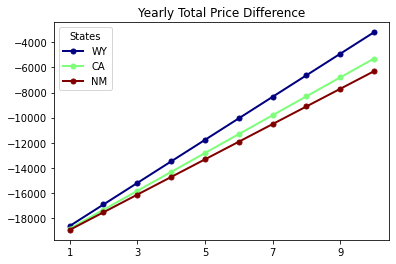

In [121]:
Time_DF = Top_3_Difference[["States","First Year Overall difference","Yearly Price Difference",'List Price Difference']].copy()
Time_DF = Time_DF.rename(columns={"First Year Overall difference": '1'})
Time_DF['2'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 2))
Time_DF['3'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 3))
Time_DF['4'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 4))
Time_DF['5'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 5))
Time_DF['6'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 6))
Time_DF['7'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 7))
Time_DF['8'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 8))
Time_DF['9'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 9))
Time_DF['10'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 10))
del Time_DF['Yearly Price Difference']
del Time_DF['List Price Difference']
Time_DF = Time_DF.set_index("States").T

Time_DF.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='Yearly Total Price Difference')

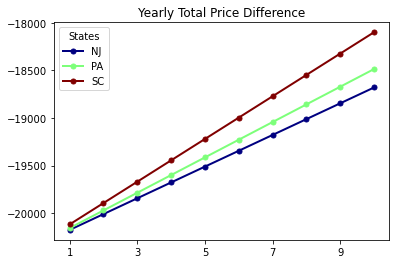

In [122]:
Time_DF = Bottom_3_Difference[["States","First Year Overall difference","Yearly Price Difference",'List Price Difference']].copy()
Time_DF = Time_DF.rename(columns={"First Year Overall difference": '1'})
Time_DF['2'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 2))
Time_DF['3'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 3))
Time_DF['4'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 4))
Time_DF['5'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 5))
Time_DF['6'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 6))
Time_DF['7'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 7))
Time_DF['8'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 8))
Time_DF['9'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 9))
Time_DF['10'] = (Time_DF['List Price Difference'] + (Time_DF['Yearly Price Difference']* 10))
del Time_DF['Yearly Price Difference']
del Time_DF['List Price Difference']
Time_DF = Time_DF.set_index("States").T

Time_DF.plot(lw=2, colormap='jet', marker='.', markersize=10, 
         title='Yearly Total Price Difference')